# Team 2 - Google Play Store

![](https://www.brandnol.com/wp-content/uploads/2019/04/Google-Play-Store-Search.jpg)

_For more information about the dataset, read [here](https://www.kaggle.com/lava18/google-play-store-apps)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights
- Visualize your analysis on Google Data Studio
- Present your works in front of the class and guests next Monday

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository. In the Jupyter Notebook, **include the link to your Google Data Studio report**.
- Submit your works through this [Google Form](https://forms.gle/oxtXpGfS8JapVj3V8).

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

_____________________________

## Some Hints for This Dataset:
- There are lots of null values. How should we handle them?
- Column `Installs` and `Size` have some strange values. Can you identify them?
- Values in `Size` column are currently in different format: `M`, `k`. And how about the value `Varies with device`?
- `Price` column is not in the right data type
- And more...


In [0]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials
from gspread_dataframe import get_as_dataframe, set_with_dataframe

gc = gspread.authorize(GoogleCredentials.get_application_default())

In [0]:
# Start your codes here!
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import re
import datetime as dt

### Read File

In [0]:
sh = gc.open('google-play-store')

In [0]:
apps = pd.DataFrame(sh.sheet1.get_all_records())
# apps = pd.read_csv('https://raw.githubusercontent.com/truongvihuy/Week4Assignment/master/google-play-store.csv')

In [0]:
apps

,Android Ver,App,Category,Content Rating,Current Ver,Genres,Installs,Last Updated,Price,Rating,Reviews,Size,Type
0,4.0.3 and up,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,Everyone,1.0.0,Art & Design,"10,000+","January 7, 2018",0,4.1,159,19M,Free
1,4.0.3 and up,Coloring book moana,ART_AND_DESIGN,Everyone,2.0.0,Art & Design;Pretend Play,"500,000+","January 15, 2018",0,3.9,967,14M,Free
2,4.0.3 and up,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,Everyone,1.2.4,Art & Design,"5,000,000+","August 1, 2018",0,4.7,87510,8.7M,Free
3,4.2 and up,Sketch - Draw & Paint,ART_AND_DESIGN,Teen,Varies with device,Art & Design,"50,000,000+","June 8, 2018",0,4.5,215644,25M,Free
4,4.4 and up,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,Everyone,1.1,Art & Design;Creativity,"100,000+","June 20, 2018",0,4.3,967,2.8M,Free
5,2.3 and up,Paper flowers instructions,ART_AND_DESIGN,Everyone,1,Art & Design,"50,000+","March 26, 2017",0,4.4,167,5.6M,Free
6,4.0.3 and up,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,Everyone,1.1,Art & Design,"50,000+","April 26, 2018",0,3.8,178,19M,Free
7,4.2 and up,Infinite Painter,ART_AND_DESIGN,Everyone,6.1.61.1,Art & Design,"1,000,000+","June 14, 2018",0,4.1,36815,29M,Free
8,3.0 and up,Garden Coloring Book,ART_AND_DESIGN,Everyone,2.9.2,Art & Design,"1,000,000+","September 20, 2017",0,4.4,13791,33M,Free
9,4.0.3 and up,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,Everyone,2.8,Art & Design;Creativity,"10,000+","July 3, 2018",0,4.7,121,3.1M,Free


In [0]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
Android Ver       10839 non-null object
App               10841 non-null object
Category          10841 non-null object
Content Rating    10841 non-null object
Current Ver       10834 non-null object
Genres            10841 non-null object
Installs          10841 non-null object
Last Updated      10841 non-null object
Price             10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Type              10840 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [0]:
apps.corr()

,Installs,Price,Rating,Reviews,Size
Installs,1.000000,-0.011689,0.051355,0.643122,0.164787
Price,-0.011689,1.000000,-0.021903,-0.009667,-0.023006
Rating,0.051355,-0.021903,1.000000,0.068141,0.083734
Reviews,0.643122,-0.009667,0.068141,1.000000,0.238215
Size,0.164787,-0.023006,0.083734,0.238215,1.000000


In [0]:
apps.isna().sum()

Android Ver          2
App                  0
Category             0
Content Rating       0
Current Ver          7
Genres               0
Installs             0
Last Updated         0
Price                0
Rating            1474
Reviews              0
Size                 0
Type                 1
dtype: int64

### The cleaning and exploration of data
#### App

In [0]:
apps['App'].unique()

array(['Photo Editor & Candy Camera & Grid & ScrapBook',
       'Coloring book moana',
       'U Launcher Lite – FREE Live Cool Themes, Hide Apps', ...,
       'Parkinson Exercices FR', 'The SCP Foundation DB fr nn5n',
       'iHoroscope - 2018 Daily Horoscope & Astrology'], dtype=object)

#### Category

In [0]:
apps['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION', 1.9],
      dtype=object)

In [0]:
apps[apps['Category'] == 1.9]
# This line is error

,Android Ver,App,Category,Content Rating,Current Ver,Genres,Installs,Last Updated,Price,Rating,Reviews,Size,Type
10472,,Life Made WI-Fi Touchscreen Photo Frame,1.9,,4.0 and up,"February 11, 2018",Free,1.0.19,Everyone,19.0,3.0M,"1,000+",0


In [0]:
apps = apps[~(apps['Category'] == 1.9)]

#### Rating

In [0]:
apps[apps['Rating'].isna()]

,Android Ver,App,Category,Content Rating,Current Ver,Genres,Installs,Last Updated,Price,Rating,Reviews,Size,Type
23,4.1 and up,Mcqueen Coloring pages,ART_AND_DESIGN,Everyone,1.0.0,Art & Design;Action & Adventure,"100,000+","March 7, 2018",0,NaN,61,7.0M,Free
113,3.0 and up,Wrinkles and rejuvenation,BEAUTY,Everyone 10+,8,Beauty,"100,000+","September 20, 2017",0,NaN,182,5.7M,Free
123,4.1 and up,Manicure - nail design,BEAUTY,Everyone,1.3,Beauty,"50,000+","July 23, 2018",0,NaN,119,3.7M,Free
126,4.1 and up,Skin Care and Natural Beauty,BEAUTY,Teen,1.15,Beauty,"100,000+","July 17, 2018",0,NaN,654,7.4M,Free
129,2.3 and up,"Secrets of beauty, youth and health",BEAUTY,Mature 17+,2,Beauty,"10,000+","August 8, 2017",0,NaN,77,2.9M,Free
130,3.0 and up,Recipes and tips for losing weight,BEAUTY,Everyone 10+,2,Beauty,"10,000+","December 11, 2017",0,NaN,35,3.1M,Free
134,3.0 and up,"Lady adviser (beauty, health)",BEAUTY,Mature 17+,3,Beauty,"10,000+","January 24, 2018",0,NaN,30,9.9M,Free
163,2.3 and up,Anonymous caller detection,BOOKS_AND_REFERENCE,Everyone,1,Books & Reference,"10,000+","July 13, 2018",0,NaN,161,2.7M,Free
180,6.0 and up,SH-02J Owner's Manual (Android 8.0),BOOKS_AND_REFERENCE,Everyone,3,Books & Reference,"50,000+","June 15, 2018",0,NaN,2,7.2M,Free
185,5.1 and up,URBANO V 02 instruction manual,BOOKS_AND_REFERENCE,Everyone,1.1,Books & Reference,"100,000+","August 7, 2015",0,NaN,114,7.3M,Free


Text(0, 0.5, 'Frequency')

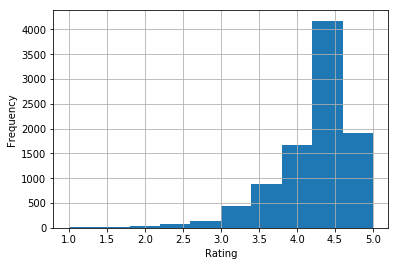

In [0]:
apps['Rating'].hist();
plt.xlabel('Rating')
plt.ylabel('Frequency')

#### Reviews

In [0]:
temp = apps['Reviews'].unique()
temp.sort()
temp

array([0, 1, 2, ..., 69119316, 78128208, 78158306], dtype=object)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Frequency')

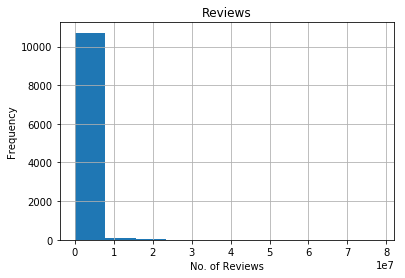

In [0]:
apps['Reviews'] = pd.to_numeric(apps['Reviews'])
apps.hist(column='Reviews')
plt.xlabel('No. of Reviews')
plt.ylabel('Frequency')

#### Size

In [0]:
apps['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [0]:
apps['Size'] = apps['Size'].str.replace('k','e+3')
apps['Size'] = apps['Size'].str.replace('M','e+6')
apps['Size'] = apps['Size'].str.replace('Varies with device','')
apps['Size']= apps['Size'].replace('Varies with device',np.nan)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Frequency')

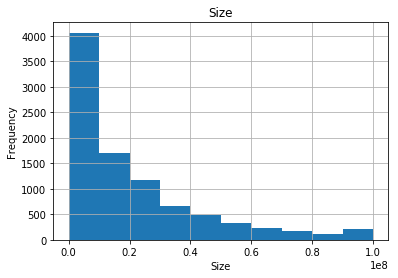

In [0]:
apps['Size'] = pd.to_numeric(apps['Size'])
apps.hist(column='Size')
plt.xlabel('Size')
plt.ylabel('Frequency')

#### Installs

In [0]:
apps['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', 0], dtype=object)

In [0]:
apps['Installs'] = apps['Installs'].apply(lambda x: str(x).strip('+'))
apps['Installs'] = apps['Installs'].apply(lambda x: str(x).replace(',',''))
apps['Installs'] = pd.to_numeric(apps['Installs'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

Text(0, 0.5, 'Frequency')

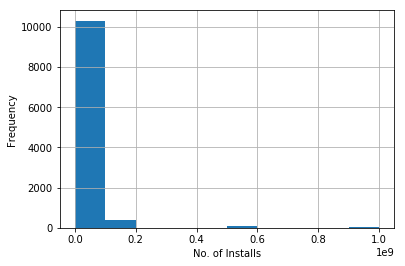

In [0]:
apps['Installs'].hist();
plt.xlabel('No. of Installs')
plt.ylabel('Frequency')

#### Type

In [0]:
apps[apps['Type'].isna()]

,Android Ver,App,Category,Content Rating,Current Ver,Genres,Installs,Last Updated,Price,Rating,Reviews,Size,Type
9148,Varies with device,Command & Conquer: Rivals,FAMILY,Everyone 10+,Varies with device,Strategy,0,"June 28, 2018",0,NaN,0,NaN,NaN


In [0]:
apps['Type'].value_counts()

Free    10039
Paid      800
Name: Type, dtype: int64

In [0]:
apps['Type'] = apps['Price'].apply(lambda money: "Free" if money == 0 else "Paid")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
apps['Type'].isna().sum()

0

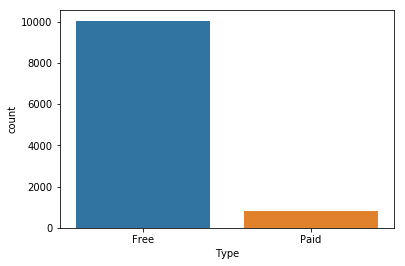

In [0]:
sns.countplot(x='Type',data=apps)

#### Price

In [0]:
apps['Price'].unique()

array([0, '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [0]:
apps['Price'] = apps['Price'].apply(lambda x: str(x).strip('$'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Frequency')

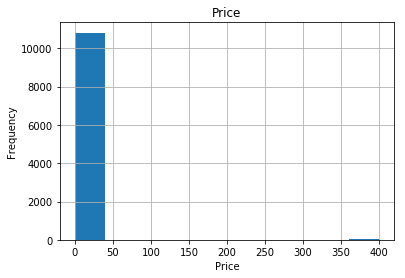

In [0]:
apps['Price'] = pd.to_numeric(apps['Price'])
apps.hist(column='Price');
plt.xlabel('Price')
plt.ylabel('Frequency')

#### Content Rating

In [0]:
apps['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

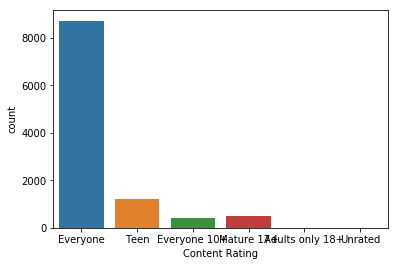

In [0]:
sns.countplot(x='Content Rating',data=apps)

#### Genres

In [0]:
apps['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

#### Last Updated

In [0]:
apps['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [0]:
apps['Last Updated'] = pd.to_datetime(apps['Last Updated'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
apps['Last Updated'] = apps['Last Updated'].dt.strftime("%Y-%m-%d")
apps

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Android Ver,App,Category,Content Rating,Current Ver,Genres,Installs,Last Updated,Price,Rating,Reviews,Size,Type,Version Begin,Version End
0,4.0.3 and up,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,Everyone,1.0,Art & Design,10000,2018-01-07,0.0,4.1,159,19000000.0,Free,4.0.3,up
1,4.0.3 and up,Coloring book moana,ART_AND_DESIGN,Everyone,2.0,Art & Design;Pretend Play,500000,2018-01-15,0.0,3.9,967,14000000.0,Free,4.0.3,up
2,4.0.3 and up,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,Everyone,1.2,Art & Design,5000000,2018-08-01,0.0,4.7,87510,8700000.0,Free,4.0.3,up
3,4.2 and up,Sketch - Draw & Paint,ART_AND_DESIGN,Teen,Varies with device,Art & Design,50000000,2018-06-08,0.0,4.5,215644,25000000.0,Free,4.2,up
4,4.4 and up,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,Everyone,1.1,Art & Design;Creativity,100000,2018-06-20,0.0,4.3,967,2800000.0,Free,4.4,up
5,2.3 and up,Paper flowers instructions,ART_AND_DESIGN,Everyone,1,Art & Design,50000,2017-03-26,0.0,4.4,167,5600000.0,Free,2.3,up
6,4.0.3 and up,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,Everyone,1.1,Art & Design,50000,2018-04-26,0.0,3.8,178,19000000.0,Free,4.0.3,up
7,4.2 and up,Infinite Painter,ART_AND_DESIGN,Everyone,6.1,Art & Design,1000000,2018-06-14,0.0,4.1,36815,29000000.0,Free,4.2,up
8,3.0 and up,Garden Coloring Book,ART_AND_DESIGN,Everyone,2.9,Art & Design,1000000,2017-09-20,0.0,4.4,13791,33000000.0,Free,3.0,up
9,4.0.3 and up,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,Everyone,2.8,Art & Design;Creativity,10000,2018-07-03,0.0,4.7,121,3100000.0,Free,4.0.3,up


#### Current Version

In [0]:
apps[apps['Current Ver'].isna()]

,Android Ver,App,Category,Content Rating,Current Ver,Genres,Installs,Last Updated,Price,Rating,Reviews,Size,Type
15,4.2 and up,Learn To Draw Kawaii Characters,ART_AND_DESIGN,Everyone,NaN,Art & Design,5000,2018-06-06,0.00,3.2,55,2700000.0,Free
6322,4.0 and up,Virtual DJ Sound Mixer,TOOLS,Everyone,NaN,Tools,500000,2017-05-10,0.00,4.2,4010,8700000.0,Free
6803,1.6 and up,BT Master,FAMILY,Everyone,NaN,Education,100,2016-11-06,0.00,NaN,0,222000.0,Free
7333,4.0 and up,Dots puzzle,FAMILY,Everyone,NaN,Puzzle,50000,2018-04-18,0.99,4.0,179,14000000.0,Paid
7407,2.3 and up,Calculate My IQ,FAMILY,Everyone,NaN,Entertainment,10000,2017-04-03,0.00,NaN,44,7200000.0,Free
7730,2.0 and up,UFO-CQ,TOOLS,Everyone,NaN,Tools,10,2016-07-04,0.99,NaN,1,237000.0,Paid
10342,3.0 and up,La Fe de Jesus,BOOKS_AND_REFERENCE,Everyone,NaN,Books & Reference,1000,2017-01-31,0.00,NaN,8,658000.0,Free


In [0]:
apps['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

In [0]:
apps['Current Ver'].fillna(value='Varies with device', inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [0]:
apps['Current Ver'].value_counts()

Varies with device    1466
1                      842
1.1                    276
1.2                    185
2                      165
1.3                    145
1.0.0                  136
1.0.1                  119
1.4                     93
1.5                     84
1.0.2                   80
2.1                     67
1.6                     66
3                       66
1.0.3                   62
1.0.4                   58
1.7                     54
2.0.0                   51
1.0.5                   50
1.1.0                   49
1.1.1                   48
1.0.6                   47
1.2.1                   46
4                       44
1.2.0                   43
1.8                     42
1.9                     37
2.3.2                   35
2.2                     35
2.4                     35
                      ... 
1.0.                     1
1.1.15.12                1
0.46.0                   1
v3.1.1                   1
2.7.7                    1
1.2.1009.695             1
6

In [0]:
apps['Current Ver'] = apps['Current Ver'].apply(lambda x: 'Varies with device' if x == 'Varies with device' else re.findall('^[0-9]\.[0-9]|[\d]|\W*',str(x))[0])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
apps['Current Ver'].unique()

array(['1.0', '2.0', '1.2', 'Varies with device', '1.1', '1', '6.1',
       '2.9', '2.8', '3.8', '3.1', '2.2', '5.5', '4', '1.5', '6', '6.7',
       '1.6', '2.1', '1.3', '1.4', '3', '1.7', '2.5', '2.4', '1.9', '0.2',
       '4.4', '2.3', '8.3', '3.2', '4.6', '4.0', '5.4', '3.0', '8', '3.3',
       '2', '9.1', '5.0', '6.0', '9.0', '7.0', '3.9', '3.4', '9.7', '4.9',
       '5.2', '3.5', '7.3', '5.1', '4.1', '9', '0.9', '6.4', '3.7', '2.6',
       '4.3', '6.3', '4.7', '4.2', '1.8', '9.8', '', '7.5', '9.9', '0.1',
       '7.7', '7.2', '6.5', '5.6', '4.5', '5.8', '8.1', '6.6', '4.8',
       '8.7', '0.0', '3.6', '5.3', '8.2', '5.7', '8.5', '5', '0', '8.0',
       '8.4', '6.8', '6.2', '2.7', '5.9', '7.8', '7.1', '7.9', '7', '8.8',
       '7.4', '9.6', '9.4', '0.7', '0.5', '7.6', '0.6', '8.9', '6.9',
       '9.3', '9.2', '8.6', '9.5', '0.8', '0.4', '0.3'], dtype=object)

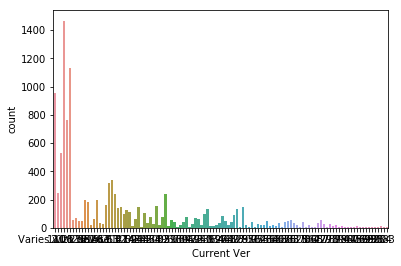

In [0]:
sns.countplot(x='Current Ver',data=apps)

#### Android version

In [0]:
apps[apps['Android Ver'].isna()]

,Android Ver,App,Category,Content Rating,Current Ver,Genres,Installs,Last Updated,Price,Rating,Reviews,Size,Type
4453,NaN,[substratum] Vacuum: P,PERSONALIZATION,Everyone,4.4,Personalization,1000,2018-07-20,1.49,4.4,230,11000000.0,Paid
4490,NaN,Pi Dark [substratum],PERSONALIZATION,Everyone,1.1,Personalization,10000,2018-03-27,0.00,4.5,189,2100000.0,Free


In [0]:
apps['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [0]:
apps['Version Begin'] = apps['Android Ver'].apply(lambda x: str(x).split(' and ')[0].split(' - ')[0])
apps['Version End'] = apps['Android Ver'].apply(lambda x: str(x).split(' and ')[-1].split(' - ')[-1])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
apps

,Android Ver,App,Category,Content Rating,Current Ver,Genres,Installs,Last Updated,Price,Rating,Reviews,Size,Type,Version Begin,Version End
0,4.0.3 and up,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,Everyone,1.0,Art & Design,10000,2018-01-07,0.0,4.1,159,19000000.0,Free,4.0.3,up
1,4.0.3 and up,Coloring book moana,ART_AND_DESIGN,Everyone,2.0,Art & Design;Pretend Play,500000,2018-01-15,0.0,3.9,967,14000000.0,Free,4.0.3,up
2,4.0.3 and up,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,Everyone,1.2,Art & Design,5000000,2018-08-01,0.0,4.7,87510,8700000.0,Free,4.0.3,up
3,4.2 and up,Sketch - Draw & Paint,ART_AND_DESIGN,Teen,Varies with device,Art & Design,50000000,2018-06-08,0.0,4.5,215644,25000000.0,Free,4.2,up
4,4.4 and up,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,Everyone,1.1,Art & Design;Creativity,100000,2018-06-20,0.0,4.3,967,2800000.0,Free,4.4,up
5,2.3 and up,Paper flowers instructions,ART_AND_DESIGN,Everyone,1,Art & Design,50000,2017-03-26,0.0,4.4,167,5600000.0,Free,2.3,up
6,4.0.3 and up,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,Everyone,1.1,Art & Design,50000,2018-04-26,0.0,3.8,178,19000000.0,Free,4.0.3,up
7,4.2 and up,Infinite Painter,ART_AND_DESIGN,Everyone,6.1,Art & Design,1000000,2018-06-14,0.0,4.1,36815,29000000.0,Free,4.2,up
8,3.0 and up,Garden Coloring Book,ART_AND_DESIGN,Everyone,2.9,Art & Design,1000000,2017-09-20,0.0,4.4,13791,33000000.0,Free,3.0,up
9,4.0.3 and up,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,Everyone,2.8,Art & Design;Creativity,10000,2018-07-03,0.0,4.7,121,3100000.0,Free,4.0.3,up


#### Xuất dữ liệu vào bảng tính Google

In [0]:
sh = gc.create('google-play-store_cleaned')

In [0]:
sh.values_update(
    'Sheet1!A1', 
    params={'valueInputOption': 'RAW'}, 
    body={'values': [apps.columns.tolist()]}
)

{'spreadsheetId': '1nGKi3rLQGT4YEWpu-8ibuuR7tJ3WEEiuuy9ceklCTrk',
 'updatedCells': 15,
 'updatedColumns': 15,
 'updatedRange': 'Sheet1!A1:O1',
 'updatedRows': 1}

In [0]:
sh.values_update(
    'Sheet1!A2', 
    params={'valueInputOption': 'RAW'}, 
    body={'values': apps.fillna("").values.tolist()}
)

{'spreadsheetId': '1nGKi3rLQGT4YEWpu-8ibuuR7tJ3WEEiuuy9ceklCTrk',
 'updatedCells': 162600,
 'updatedColumns': 15,
 'updatedRange': 'Sheet1!A2:O10841',
 'updatedRows': 10840}